In [1]:
#Libraries
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import community
from networkx.readwrite import json_graph

In [2]:
def FileToDict(name):
    f = open(name,'r')
    f = f.read()
    import ast
    f = ast.literal_eval(f)
    return f
islam = FileToDict("Islam.txt")
christianity = FileToDict("Christianity.txt")

In [3]:
import json
with open('christianity.json', 'w') as fp:
    json.dump(christianity, fp)

In [4]:
#remove christion 270
import random
for x in range(270):
    christianity.pop( random.choice(christianity.keys()) ) 

#Numbers on the users and  posts/comments

In [5]:
def getMeanContributions(inputDict):
    mean = 0
    for user in inputDict:
        mean += len(inputDict[user])
    return mean/len(inputDict)

#Total users
print "Total users:"
print "Islam: %d" %(len(islam))
print "Christianity: %d" %(len(christianity))
print "-------------"
print "Average contributions"
print "Islam: %d" %(getMeanContributions(islam))
print "Christianity: %d" %(getMeanContributions(christianity))

Total users:
Islam: 483
Christianity: 483
-------------
Average contributions
Islam: 45
Christianity: 50


#Creating an overview graph

In [136]:
Q = nx.Graph()

In [137]:
overviewDict = {}
def addToOverview(subredditDict, finalDict):
    for user in subredditDict:
        for subreddit in subredditDict[user]:
            if subreddit not in overviewDict:
                overviewDict[subreddit] = 1
            else:
                overviewDict[subreddit] += 1
addToOverview(islam, overviewDict)
addToOverview(christianity, overviewDict)


**Filtering low degree subreddits away**

In [138]:
overviewFinal = {}
for subreddit in overviewDict:
    if overviewDict[subreddit] >= 300:
        overviewFinal[subreddit] = overviewDict[subreddit]

In [139]:
for subreddit in overviewFinal:
    Q.add_node(subreddit, size=overviewFinal[subreddit])
Q.remove_node("Christianity")

<function matplotlib.pyplot.show>

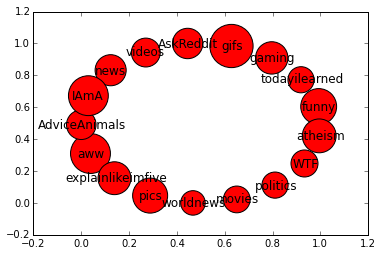

In [140]:
nx.draw_networkx_nodes(Q, pos=nx.spring_layout(Q), node_size=[Q.node[v]["size"]*2 for v in Q])
nx.draw_networkx_labels(Q, pos=nx.spring_layout(Q))
plt.show

#Creating the person to subreddit graph

In [141]:
G = nx.DiGraph()

In [142]:
def AddUserToSubredditInGraph(graph, dictOfUsersWithSubreddits, nodeColor):
    for user in dictOfUsersWithSubreddits.keys():
        for subreddit in dictOfUsersWithSubreddits[user]:
            #graph.add_edge(user, subreddit)
            graph.add_node(user, color=nodeColor)
            graph.add_node(subreddit, color="g")
            graph.add_edge(user, subreddit)

In [143]:
AddUserToSubredditInGraph(G, islam, "r")
AddUserToSubredditInGraph(G, christianity, "b")
print len(G.nodes())

10678


**Filtering low in-degree subreddits away**

In [144]:
def rgb_to_hex(rgb):
    return '%02x%02x%02x' % rgb

In [145]:
from __future__ import division
import math
shared_subreddits_total = {}
shared_subreddits_c_percent = {}
for x in G.nodes():
    if G.node[x]["color"] == "g":
        if G.in_degree(x) > 100:
            ccount = 0
            icount = 0
            for n in G.predecessors(x):
                if G.node[n]["color"] == "r":
                    icount += 1
                if G.node[n]["color"] == "b":
                    ccount += 1
            total = ccount+icount
            cpercent = math.ceil((ccount/total)*100)
            ipercent = 100 - cpercent
            b = (255 * (ccount/(ccount+icount)))
            r = (255 * (1 - (ccount/(ccount+icount))))
            g = 125
            print "shared_subreddits.addNode('%s', {count: %d, color:'#%s'});" %(x,((ccount+icount)/20),rgb_to_hex((r,g,b)))

shared_subreddits.addNode('gaming', {count: 22, color:'#597da5'});
shared_subreddits.addNode('Android', {count: 6, color:'#737d8b'});
shared_subreddits.addNode('malefashionadvice', {count: 5, color:'#517dad'});
shared_subreddits.addNode('DebateReligion', {count: 5, color:'#807d7e'});
shared_subreddits.addNode('technology', {count: 14, color:'#607d9e'});
shared_subreddits.addNode('gameofthrones', {count: 5, color:'#657d99'});
shared_subreddits.addNode('pics', {count: 39, color:'#617d9d'});
shared_subreddits.addNode('todayilearned', {count: 31, color:'#617d9d'});
shared_subreddits.addNode('science', {count: 11, color:'#4b7db3'});
shared_subreddits.addNode('funny', {count: 39, color:'#5e7da0'});
shared_subreddits.addNode('religion', {count: 5, color:'#797d85'});
shared_subreddits.addNode('LifeProTips', {count: 8, color:'#6f7d8f'});
shared_subreddits.addNode('SubredditDrama', {count: 5, color:'#5f7d9f'});
shared_subreddits.addNode('books', {count: 9, color:'#5b7da3'});
shared_subreddits.ad

In [146]:
for x in G.nodes():
    if G.node[x]["color"] == "g":
        if G.in_degree(x) < 200:
            G.remove_node(x)
            #print G.in_degree(x)
for x in G.nodes():
    if G.node[x]["color"] != "g":
        if G.out_degree(x) < 1:
            G.remove_node(x)

labels = {}
for x in G.nodes():
    if G.node[x]["color"] == "g":
        if G.in_degree(x) > 300:
            labels[x] = x
print len(labels)

17


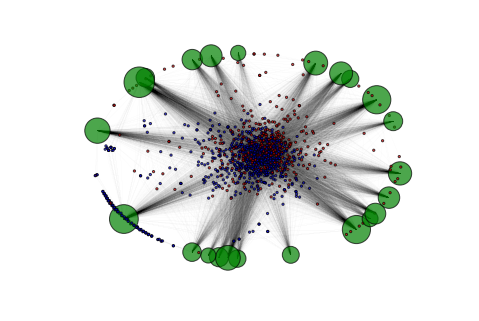

In [147]:
node_color=[G.node[v]["color"] for v in G.nodes()]
d = nx.degree(G)

pos = {}
#nx.draw_networkx_nodes(G, pos=nx.spring_layout(G), node_color = node_color, node_size=[(G.in_degree(v)+5) for v in G], with_labels=False, k=1, iterations=10, alpha=0.5)
#nx.draw_networkx_edges(G, pos=nx.spring_layout(G), k=1, iterations=10, alpha=0.01, arrows=False, width=1)
#nx.draw_networkx_labels(G, pos=nx.spring_layout(G), labels = labels, font_size=16, font_color='c', alpha = 0.5)

nx.draw_spring(G, node_color = node_color, node_size=[(G.in_degree(v)+5) for v in G], with_labels=False, alpha=0.7, width=0.01, arrows=False)
#nx.draw_networkx_labels(G,nx.spring_layout(G),labels,font_size=10)
plt.savefig('./user_to_subreddit.png', dpi=300)
plt.show()

#Creating the Community to Subreddit Graph

In [148]:
H = nx.DiGraph()

In [149]:
H.add_node("Islam", color="r")
H.add_node("Christianity", color="b")
def FromCommunityToSubredditInGraph(graph, dictOfUsersFromSubreddit, name, nodeColor):
    for user in dictOfUsersFromSubreddit.keys():
        for subreddit in dictOfUsersFromSubreddit[user]:
            graph.add_node(subreddit, color="g")
            graph.add_edge(name, subreddit)
FromCommunityToSubredditInGraph(H, islam, "Islam", "r")
FromCommunityToSubredditInGraph(H, christianity, "Christianity", "b")

NameError: name 'pyplot' is not defined

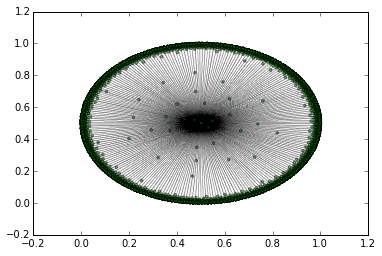

In [150]:
node_color=[H.node[v]["color"] for v in H.nodes()]
f = nx.degree(H)

labels = {}
for x in H.nodes():
    if H.node[x]["color"] == "b" and f[x] > 1:
        labels[x] = x
nx.draw_networkx_nodes(H, pos=nx.spring_layout(H), node_color = node_color, node_size=[(H.in_degree(v)+5) for v in H], with_labels=False, k=1, iterations=10, alpha=0.5)
nx.draw_networkx_edges(H, pos=nx.spring_layout(H), k=1, iterations=10, alpha=0.01, arrows=False, width=1)
#nx.draw_networkx_labels(H, pos=nx.spring_layout(H), labels = labels, font_size=16, font_color='c', alpha = 0.5)
pyplot.savefig('./community_to_subreddit.pdf', dpi=300)
plt.show()

#New try

In [ ]:
P = nx.Graph()
P.add_node("ISLAM")
P.add_node("CHRISTIANITY")
P.node["ISLAM"]["size"] = 100
P.node["ISLAM"]["color"] = "r"
P.node["CHRISTIANITY"]["size"] = 100
P.node["CHRISTIANITY"]["color"] = "b"

In [ ]:
overviewIslam = {}
overviewChristianity = {}
def addToOverview(subredditDict, finalDict):
    for user in subredditDict:
        for subreddit in subredditDict[user]:
            if subreddit not in finalDict:
                finalDict[subreddit] = 1
            else:
                finalDict[subreddit] += 1
addToOverview(islam, overviewIslam)
addToOverview(christianity, overviewChristianity)

**Filter low degree**

In [ ]:
overviewFinalIslam = {}
overviewFinalChristianity = {}
def filterLow(inputDict, outputDict, threshold):
    for subreddit in inputDict:
        if inputDict[subreddit] >= threshold:
            outputDict[subreddit] = inputDict[subreddit]
filterLow(overviewIslam, overviewFinalIslam, 75)
filterLow(overviewChristianity, overviewFinalChristianity, 75)
overviewFinalChristianity.pop("Christianity")

In [ ]:
for subreddit in overviewFinalIslam:
    if subreddit not in P.nodes():
        P.add_node(subreddit, size=overviewFinalIslam[subreddit], color="g")
    else:
        P.node[subreddit]["size"] += overviewFinalIslam[subreddit]
    P.add_edge("ISLAM", subreddit, color="r")
for subreddit in overviewFinalChristianity:
    if subreddit not in P.nodes():
        P.add_node(subreddit, size=overviewFinalChristianity[subreddit], color="g")
    else:
        P.node[subreddit]["size"] = overviewFinalChristianity[subreddit]
    P.add_edge("CHRISTIANITY", subreddit, color="b")


In [ ]:
try:
    P.remove_node("Christianity")
except:
    print ""
node_color=[P.node[v]["color"] for v in P.nodes()]

def edgecolor(edge):
    return P.get_edge_data(edge[0],edge[1])["color"]

def nodecolor(node):
    returnValue= 0
    if node == "CHRISTIANITY":
        return 0
    elif node == "ISLAM":
        return 100
    else:
        try:
            returnValue = overviewFinalChristianity[node]
        except:
            return 100
        try:
            returnValue = overviewFinalIslam[node]
        except:
            return 0
        returnValue = overviewFinalIslam[node]+overviewFinalChristianity[node]
        returnValue = 100*overviewFinalIslam[node]/returnValue
        
        return returnValue

#nx.draw_networkx_nodes(P, pos=nx.spring_layout(P), node_size=[P.node[v]["size"]*2 for v in P.nodes()], node_color=node_color)
#nx.draw_networkx_edges(P, pos=nx.spring_layout(P))
#nx.draw_networkx_labels(P, pos=nx.spring_layout(P))
nx.draw_spring(P, node_color = [nodecolor(v) for v in P.nodes()], node_size=[P.node[v]["size"]*2 for v in P.nodes()], with_labels=True, edge_color=[edgecolor(v) for v in P.edges()], cmap=plt.cm.bwr)
plt.show

In [ ]:
def showDegree(subredditName):
    try:
        overviewFinalChristianity[subredditName]
        print "Christianity"
        print overviewFinalChristianity[subredditName]
    except:
        print "No Christianity"
    try:
        overviewFinalIslam[subredditName]
        print "Islam"
        print overviewFinalIslam[subredditName]
    except:
        print "No Islam"
        
showDegree("videos")

#Modularity

In [ ]:
X = nx.Graph()

In [ ]:
def AddUserToSubredditInGraph(graph, dictOfUsersWithSubreddits, nodeColor):
    for user in dictOfUsersWithSubreddits.keys():
        for subreddit in dictOfUsersWithSubreddits[user]:
            #graph.add_edge(user, subreddit)
            graph.add_node(user, color=nodeColor)
            graph.add_node(subreddit, color="g")
            graph.add_edge(user, subreddit)  

In [ ]:
AddUserToSubredditInGraph(X, islam, "r")
AddUserToSubredditInGraph(X, christianity, "b")

In [ ]:
Z = nx.Graph()

In [ ]:
for user in islam:
    for subreddit in islam[user]:
        for neighbor in X.neighbors(subreddit):
            Z.add_edge(user,neighbor)
for user in christianity:
    for subreddit in christianity[user]:
        for neighbor in X.neighbors(subreddit):
            Z.add_edge(user,neighbor)
for node in Z.nodes():
    if node in overviewDict.keys():
        Z.remove_node(node)

<function matplotlib.pyplot.show>

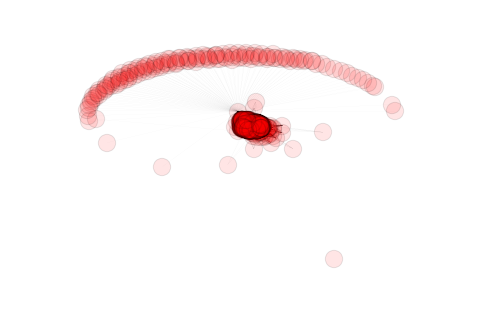

In [151]:
nx.draw_spring(Z, width=0.1, alpha=0.1)
plt.show

In [28]:
cent = nx.degree_centrality(Z)
print sorted(cent.items(), key = lambda (w, c) : (-c, w))[:5]

[('Valens', 0.9906054279749477), ('xAsianZombie', 0.9885177453027139), ('Rattional', 0.987473903966597), ('Last_Jedi', 0.98643006263048), ('crime_fighter', 0.98643006263048)]


In [133]:
print len(Z.nodes())

1370


In [134]:
part = community.best_partition(Z)
print community.modularity(part, Z)

0.0318604926036


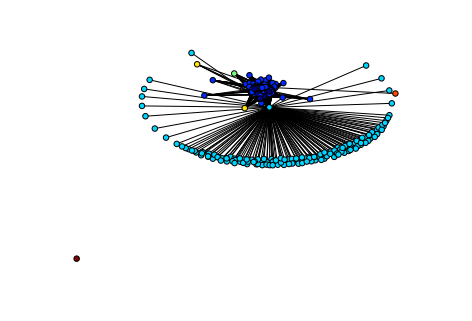

In [135]:
part = community.best_partition(Z)
values = [part.get(node) for node in Z.nodes()]

nx.draw_spring(Z, cmap = plt.get_cmap('jet'), node_color = values, node_size=30, with_labels=False)

In [32]:
mod = community.modularity(part,Z)
print("modularity:", mod)

('modularity:', 0.03420509846055782)


In [33]:
print community.best_partition(Z)

{'JustLebanese': 0, 'KaraokeKitten': 1, 'Prof_Acorn': 0, 'jbbarnes88': 0, 'MrXxxKillsHimself': 1, 'Jedi-Mocro': 1, 'salahelbat': 1, 'Bremstralung': 0, 'darkmagician47': 1, 'davidjricardo': 0, 'chillbrosa': 0, 'ianfloridian': 0, 'aDinoSupremacist': 1, 'jonathandmedina': 0, 'TheAndrewSpence': 0, 'Petirep': 0, 'Lite-brite': 1, 'lalalauryn': 0, 'apophis-pegasus': 0, 'RoastedCashew': 1, 'Haris132': 1, 'headshotcatcher': 1, 'palindrome101': 1, 'Malteb': 1, 'salawm': 1, 'Agrona': 0, 'eac3742': 0, 'safia1172': 1, 'SheWantsTheVick': 1, 'crackguy': 1, 'MeredithofArabia': 0, 'thoumyvision': 2, 'h4qq': 1, 'Honeybeard': 3, 'chikken_biryani': 1, 'jollybot': 1, 'SecretSnack': 0, 'brucelikesmusic': 0, 'akbermo': 1, 'shoppewithanE': 0, 'kdejelaska': 1, 'Sprinkleofme': 1, 'pagodahut': 1, 'ResidentRedneck': 0, 'sonosmanli': 0, 'WakkaWakkaMothaFucka': 1, 'Little_babby': 0, 'K_M_H_': 1, 'ZackFrost': 0, 'shaziru': 0, 'CATHOLIC_EXTREMIST': 1, 'akubhai': 0, 'tekkaiwallace': 1, 'bodmon': 1, 'u1s2e3r4': 1, 'unk

In [34]:
percentage = {}
bestPart = community.best_partition(Z)
for user in bestPart:
    if bestPart[user] in percentage:
        if user in christianity:
            percentage[bestPart[user]][0] += 1
        if user in islam:
            percentage[bestPart[user]][1] += 1
    else:
        if user in christianity:
            percentage[bestPart[user]] = [1,0]
            if user in islam:
                percentage[bestPart[user]][1] += 1
        if user in islam:
            percentage[bestPart[user]] = [0,1]
print percentage

{0: [373, 50], 1: [101, 424], 2: [6, 2], 3: [2, 4], 4: [0, 1], 5: [0, 1], 6: [0, 1]}


**Percentage appearance of each relegious group in the modality groups**

In [35]:
for x in percentage:
    total = percentage[x][0] + percentage[x][1]
    cP = float(percentage[x][0])/total * 100
    cP = format(cP, '.2f')
    iP = float(percentage[x][1])/total * 100
    iP = format(iP, '.2f')
    print "In group [%s] with %s people - Christianity is %s%%, and Islam is %s%%" %(str(x),str(total),str(cP),str(iP))

In group [0] with 423 people - Christianity is 88.18%, and Islam is 11.82%
In group [1] with 525 people - Christianity is 19.24%, and Islam is 80.76%
In group [2] with 8 people - Christianity is 75.00%, and Islam is 25.00%
In group [3] with 6 people - Christianity is 33.33%, and Islam is 66.67%
In group [4] with 1 people - Christianity is 0.00%, and Islam is 100.00%
In group [5] with 1 people - Christianity is 0.00%, and Islam is 100.00%
In group [6] with 1 people - Christianity is 0.00%, and Islam is 100.00%


**Seperated Islam Modality**

('modularity:', 0.019221942154064923)


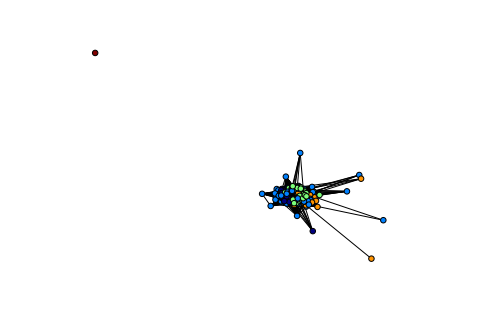

In [36]:
X = nx.Graph()
AddUserToSubredditInGraph(X, islam, "r")


I = nx.Graph()
for user in islam:
    for subreddit in islam[user]:
        for neighbor in X.neighbors(subreddit):
            I.add_edge(user,neighbor)
part = community.best_partition(I)
values = [part.get(node) for node in I.nodes()]

nx.draw_spring(I, cmap = plt.get_cmap('jet'), node_color = values, node_size=30, with_labels=False)
plt.show
mod = community.modularity(part,I)
print("modularity:", mod)

**Seperated Christianity Modality**

('modularity:', 0.004101464242748698)


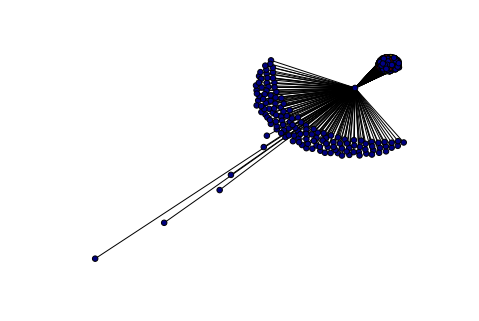

In [37]:
X = nx.Graph()
AddUserToSubredditInGraph(X, christianity, "b")


I = nx.Graph()
for user in christianity:
    for subreddit in christianity[user]:
        for neighbor in X.neighbors(subreddit):
            I.add_edge(user,neighbor)
part = community.best_partition(I)
values = [part.get(node) for node in I.nodes()]

nx.draw_spring(I, cmap = plt.get_cmap('jet'), node_color = values, node_size=30, with_labels=False)
plt.show
mod = community.modularity(part,I)
print("modularity:", mod)